In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.ensemble import RandomForestRegressor

print(pd.__version__)
print(np.__version__)

2.3.2
2.2.6


In [2]:
#load the dataset
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
#counting null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
#dropping unwanted columns'
df=df.drop(['area_type','availability','society','balcony'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [7]:
#handling null values in location
df['location'].value_counts()
df['location']=df['location'].fillna('Whitefield')#filled the missing value with most repeated value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
#handling null values in size
df['size'].value_counts()
df['size']=df['size'].fillna('2 BHK')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
#handilng null values in bath
df['bath']=df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
df.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [11]:
#cleaning size column
df['size'].unique()
out=[i.split()[0] for i in df['size']]
df['bhk']=out
df['bhk']=df['bhk'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 624.5+ KB


In [12]:
df=df.drop('size',axis=1)

In [13]:
df['total_sqft'].unique()
#df['total_sqft']=df['total_sqft'].astype(int)
def convert(a):
    l=a.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(a)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert)
df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median())

In [14]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [15]:
#cleaning location
df['location'].value_counts()

location
Whitefield                 541
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [16]:
location_count=df['location'].value_counts()
location_less_than_10=location_count[location_count<=10]
location_less_than_10

location
Ganga Nagar                10
Sadashiva Nagar            10
Nagappa Reddy Layout       10
Dodsworth Layout           10
Dairy Circle               10
                           ..
Park View Layout            1
Xavier Layout               1
Air View Colony             1
akshaya nagar t c palya     1
mvj engineering college     1
Name: count, Length: 1064, dtype: int64

In [17]:
#df['location']=df['location'].apply(lambda i:'others ' if i in location_less_than_10 else i) 

df['location']=['others'if i in location_less_than_10 else i for i in df['location']]
df['location'].value_counts()


location
others                       2900
Whitefield                    541
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [18]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+03
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [19]:
df=df[(df['total_sqft']/df['bhk'])>=300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [20]:
df=df[df['bath']<=df['bhk']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11736 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11736 non-null  object 
 1   total_sqft      11736 non-null  float64
 2   bath            11736 non-null  float64
 3   price           11736 non-null  float64
 4   bhk             11736 non-null  int64  
 5   price_per_sqft  11736 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 641.8+ KB


In [21]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000
mean,1513.083206,2.411128,99.365023,2.593643,6079.407673
std,1201.449248,0.884333,122.660264,0.937278,3908.694052
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1105.000000,2.000000,48.000000,2.000000,4166.666667
50%,1275.500000,2.000000,67.000000,2.000000,5190.476190
75%,1622.000000,3.000000,104.000000,3.000000,6666.666667
max,52272.000000,16.000000,2800.000000,16.000000,176470.588235


In [22]:
df=df[df['bhk']<=6]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000
mean,1492.680036,2.378432,97.741069,2.556881,6064.013401
std,1116.032860,0.778835,117.464798,0.819972,3877.317587
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1101.000000,2.000000,48.000000,2.000000,4166.666667
50%,1272.000000,2.000000,67.000000,2.000000,5190.367471
75%,1610.000000,3.000000,101.000000,3.000000,6666.666667
max,52272.000000,6.000000,2800.000000,6.000000,176470.588235


<class 'pandas.core.frame.DataFrame'>
Index: 11656 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11656 non-null  object 
 1   total_sqft      11656 non-null  float64
 2   bath            11656 non-null  float64
 3   price           11656 non-null  float64
 4   bhk             11656 non-null  int64  
 5   price_per_sqft  11656 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 637.4+ KB


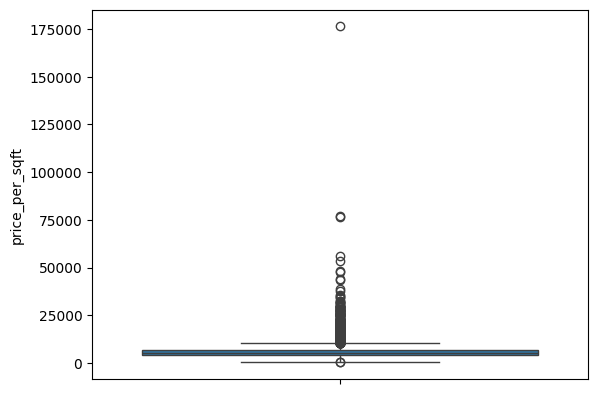

In [23]:
sns.boxplot(y='price_per_sqft',data=df)
df.info()

<Axes: ylabel='price_per_sqft'>

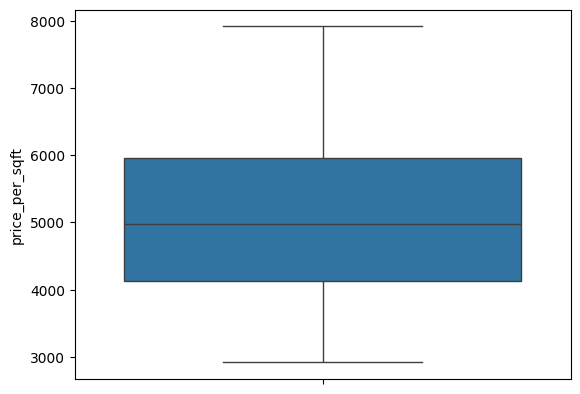

In [24]:
#handling outliers in price_per_sqft
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR=q3-q1
low_bound=q1-0.5*IQR
up_bound=q3+0.5*IQR
df=df[(df['price_per_sqft']>=low_bound) & (df['price_per_sqft']<=up_bound)]
sns.boxplot(y='price_per_sqft',data=df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9522 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9522 non-null   object 
 1   total_sqft      9522 non-null   float64
 2   bath            9522 non-null   float64
 3   price           9522 non-null   float64
 4   bhk             9522 non-null   int64  
 5   price_per_sqft  9522 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 520.7+ KB


In [26]:
df=df.drop('price_per_sqft',axis=1)

In [27]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [28]:
df.reset_index(inplace=True)

In [29]:
df=df.drop('index',axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Uttarahalli,1440.0,2.0,62.00,3
2,Lingadheeranahalli,1521.0,3.0,95.00,3
3,Kothanur,1200.0,2.0,51.00,2
4,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
9517,Uttarahalli,1345.0,2.0,57.00,3
9518,Green Glen Layout,1715.0,3.0,112.00,3
9519,Whitefield,3453.0,4.0,231.00,5
9520,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [30]:
copied_dataset=df.copy()
copied_dataset.to_csv('copied.csv')

In [31]:
obj=LabelEncoder()
df['location']=obj.fit_transform(df['location'])
df.head()
copied_dataset

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Uttarahalli,1440.0,2.0,62.00,3
2,Lingadheeranahalli,1521.0,3.0,95.00,3
3,Kothanur,1200.0,2.0,51.00,2
4,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
9517,Uttarahalli,1345.0,2.0,57.00,3
9518,Green Glen Layout,1715.0,3.0,112.00,3
9519,Whitefield,3453.0,4.0,231.00,5
9520,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9522 entries, 0 to 9521
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    9522 non-null   int64  
 1   total_sqft  9522 non-null   float64
 2   bath        9522 non-null   float64
 3   price       9522 non-null   float64
 4   bhk         9522 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 372.1 KB


In [33]:
X=df.drop('price',axis=1)
y=df['price']

In [34]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
model=RandomForestRegressor(n_estimators=200,max_depth=10)
model.fit(Xtrain,ytrain)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
model.score(Xtest,ytest)

0.8319027631461611

In [47]:
model.score(Xtrain,ytrain)

0.9113450582134969

In [38]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(model,file)